In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image

# Only for positive values
def nearest_integer(i):
    if( float(i-int(i)) >= 0.5 ):
        return int(i)+1
    return int(i)

# y = (x-x1)( (y2-y1) / (x2-x1) ) + y1
# For this algorithm x2-x1 = 1 always
# y = (x-x1)(y2-y1) + y1
def line(x, x1, y1, x2, y2):
    f1 = x-x1
    f2 = y2-y1
    y = (f1*f2) + y1
    return y

# Calculate ratio given by:
# original_size:x -> new_size:x1
# variable_a -> 1
def calculate_ratio(x, x1):
    return x/x1

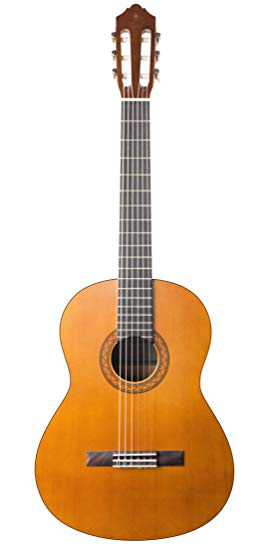

In [5]:
image_name = "./a.jpg"
image = Image.open(image_name)
image

In [20]:
image_array = np.asarray(image)
print(image_array.shape)
# plt.imshow(image_array)

(550, 269, 3)


/home/bryan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: overflow encountered in ubyte_scalars


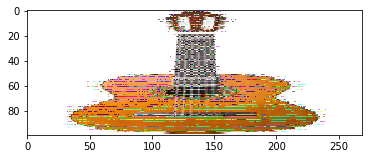

In [7]:
height = image_array.shape[0]
width = image_array.shape[1]
channels = image_array.shape[2]

new_height = 100
new_width = 100

"""
""
""
""    For new image height
""
""
"""


resized_image = image_array.copy()
resized_image.resize(new_height, width, channels)
#print(resized_image.shape)
#plt.imshow(resized_image)

#Calculating new ratio
a = calculate_ratio(height, new_height)

# Images of 3 channels at least RGB
top_height = new_height-1
index = 1
# resized_image[new_height-1, :, :] = image_array[height-1, :, :]

for i in range(0, 3):
    for j in range(0, width):
        for index in range(1, top_height):
            x = a*index
            x1 = int(x)
            y1 = image_array[x1, j, i]
            x2 = x1+1
            y2 = image_array[x2, j, i]
            resized_image[index, j, i] = nearest_integer(line(x, x1, y1, x2, y2))

plt.imshow(resized_image)

(100, 100, 3)
2.69


/home/bryan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: overflow encountered in ubyte_scalars


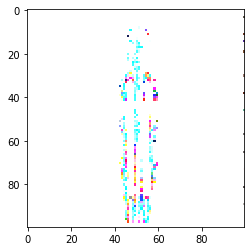

In [18]:

"""
""
""
""    For new image width
""
""
"""

resized_image.resize(new_height, new_width, channels)
print(resized_image.shape)
plt.imshow(resized_image)

#Calculating new ratio
a = calculate_ratio(width, new_width)
print(a)

# Images of 3 channels at least RGB
top_width = new_width-1

for i in range(0,3):
    for j in range(0, new_height):
        for index in range(0, top_width):
            x = a * index
            x1 = int(x)
            x1 = image_array[j, x1, i]
            x2 = x1 + 1 
            y2 = image_array[j, x2, i]
            
            resized_image[j, index, i] = nearest_integer(line(x, x1, y1, x2, y2))
            
plt.imshow(resized_image)